<a href="https://colab.research.google.com/github/hr7git/20250714_count_TAX/blob/main/snu_deep_day2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# fashion mnist 데이터 부르기


In [ ]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of testing images: (10000, 28, 28)
Shape of testing labels: (10000,)
Number of classes: 10
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


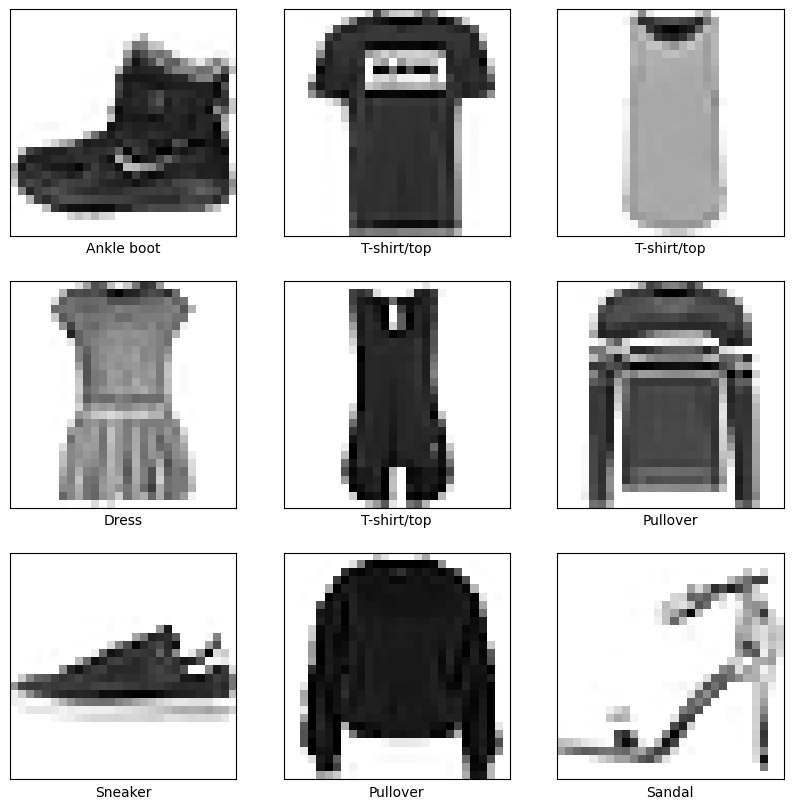

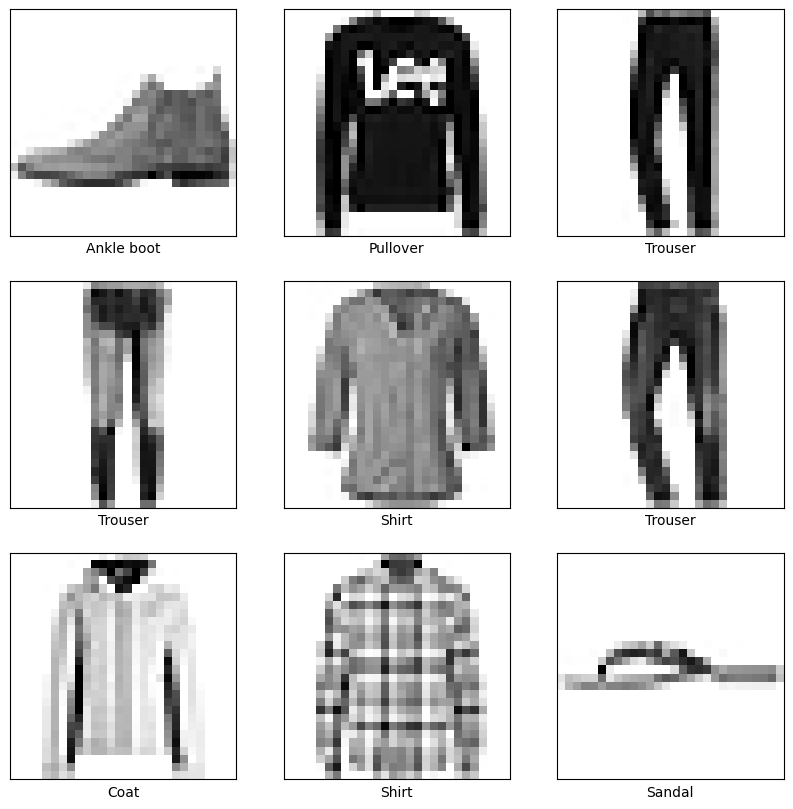

In [ ]:
# exploratory data analysis ( imshow of 9 images of train and the 9 images of test, shape of train and test, and number of classes and names of claesss). 데이터 탐색

import matplotlib.pyplot as plt
import numpy as np

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the shape of the training and testing data
print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of testing images:", test_images.shape)
print("Shape of testing labels:", test_labels.shape)

# Display the number of classes
print("Number of classes:", len(class_names))
print("Class names:", class_names)

# Display 9 random images from the training set
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Display 9 random images from the testing set
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [ ]:
# 데이터 사이즈 확인

train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# variable 을 x_train 과 x_test 로 변경해줘
x_train, x_test = train_images, test_images

In [ ]:
# 데이터 사이즈 확인
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# 전처리: 데이터를 255로 나구기


In [ ]:
# 전처리: 데이터를 255로 나누어 스케일링
x_train = x_train / 255.0
x_test = x_test / 255.0

# Task
Load the Fashion MNIST dataset, build, compile, train, and evaluate a neural network model to classify the images.

## Build the model

### Subtask:
Define the architecture of the neural network, including the layers and activation functions.


**Reasoning**:
Define the architecture of the neural network using a sequential model with Flatten, Dense layers and appropriate activation functions as per the instructions.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compile the model

### Subtask:
Configure the model for training by specifying the optimizer, loss function, and metrics.


**Reasoning**:
Compile the model with the specified optimizer, loss function, and metrics.



In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

### Subtask:
Train the model using the preprocessed training data and labels.


**Reasoning**:
Train the compiled model using the training data and labels, including validation data and storing the training history.



In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Define the checkpoint callback
checkpoint_path = "training_checkpoints/cp.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


history = model.fit(x_train, train_labels, epochs=10, validation_data=(x_test, test_labels),
                                callbacks=[cp_callback])

Epoch 1/10
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9122 - loss: 0.2333
Epoch 1: saving model to training_checkpoints/cp.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9122 - loss: 0.2333 - val_accuracy: 0.8803 - val_loss: 0.3450
Epoch 2/10
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9154 - loss: 0.2269
Epoch 2: saving model to training_checkpoints/cp.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9154 - loss: 0.2269 - val_accuracy: 0.8779 - val_loss: 0.3460
Epoch 3/10
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9197 - loss: 0.2182
Epoch 3: saving model to training_checkpoints/cp.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9197 - loss: 0.2182 - val_accuracy: 0.8926 - val_loss: 0.3221
Epoch 4/10
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9224 - loss: 0.2093
Epoch 4: saving model to training_checkpoints/cp.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accur

**Reasoning**:
The subtask is to load the data and display the first few rows.



In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8900 - loss: 0.3476

Test accuracy: 0.8899999856948853


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Prediction for the first image:
[2.1780519e-08 2.4599463e-14 1.7199600e-12 2.6837035e-12 1.4574536e-10
 5.4089661e-04 4.5851085e-08 3.6631545e-04 8.9519308e-09 9.9909270e-01]
Predicted label for the first image: 9
Actual label for the first image: 9


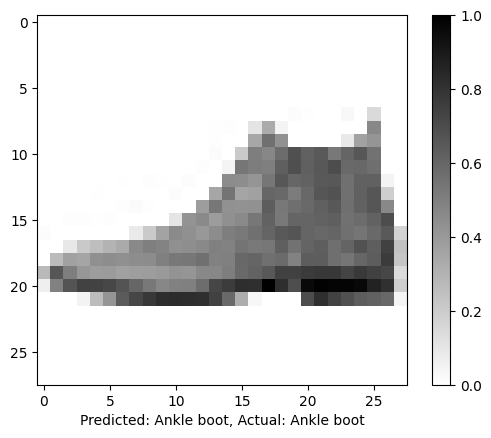

In [ ]:
import numpy as np

# Make predictions on the test set
predictions = model.predict(x_test)

# Display the first prediction
print("Prediction for the first image:")
print(predictions[0])

# Get the predicted class label for the first image
predicted_label = np.argmax(predictions[0])
print("Predicted label for the first image:", predicted_label)
print("Actual label for the first image:", test_labels[0])

# Display the first image with predicted and actual labels
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.xlabel(f"Predicted: {class_names[predicted_label]}, Actual: {class_names[test_labels[0]]}")
plt.colorbar()
plt.grid(False)
plt.show()

## Save the model

You can save the entire model (architecture, weights, and optimizer state) or just the weights. Saving the entire model is useful if you want to be able to load it and continue training or make predictions without having to redefine the model architecture.

In [ ]:
# Save the entire model
model.save('fashion_mnist_model.h5')
print("Model saved as fashion_mnist_model.h5")

Model saved as fashion_mnist_model.h5


## Load the model

To load the saved model, you can use `keras.models.load_model()`.

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('fashion_mnist_model.h5')
print("Model loaded successfully.")

# You can now use the loaded model for evaluation or prediction
loss, acc = loaded_model.evaluate(x_test, test_labels, verbose=2)
print("Loaded model accuracy:", acc)

Model loaded successfully.
313/313 - 1s - 3ms/step - accuracy: 0.8900 - loss: 0.3476
Loaded model accuracy: 0.8899999856948853
